In [2]:
#---------------------------------------------------
# START JVM
#-----------------------------------------------------

from jpype import startJVM, getDefaultJVMPath, JArray, JDouble, JInt, JPackage, shutdownJVM, isJVMStarted
import numpy as np
import sys
# Our python data file readers are a bit of a hack, python users will do better on this:
sys.path.append("/home/jovyan/notebooks/jidt/demos/python")

# Add JIDT jar library to the path
jarLocation = "/home/jovyan/notebooks/jidt/infodynamics.jar"
# Start the JVM (add the "-Xmx" option with say 1024M if you get crashes due to not enough memory space)
if (not isJVMStarted()):
    startJVM(getDefaultJVMPath(), "-ea", "-Djava.class.path=" + jarLocation)

javaIntList = lambda l : JArray(JInt, 1)(l)
javaDoubleList = lambda l : JArray(JDouble, 1)(l)

In [3]:
# LOAD DATA FILE
#-------------------

import pandas as pd
#from pathlib import Path

filename = './data/week11-te-heartbeat.txt'
data = pd.read_csv(filename, delim_whitespace=True, comment='%', header=None, index_col=None, names=['source', 'target'])
npdata = data.to_numpy()
npdata.shape

(100000, 2)

<AxesSubplot:>

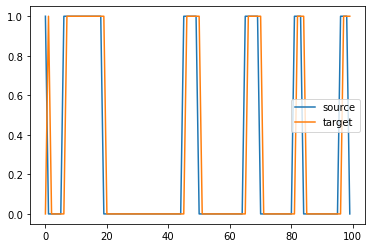

In [4]:
data[0:100][:].plot()

In [5]:
source = javaIntList(data['source'].astype(np.uint8).tolist())
target = javaIntList(data['target'].astype(np.uint8).tolist())

In [6]:

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").TransferEntropyCalculatorDiscrete
# base
# k_history (target)
# k_tau (target)
# i_history (source)
# i_tau (source)
# delay
calc = calcClass(2, 1, 1, 1, 1, 1)
# 2. No other properties to set for discrete calculators.
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.addObservations(source, target)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

locals = calc.computeLocalFromPreviousObservations(source, target)

print("TE_Discrete(col_0 -> col_1) = %.4f bits" %
    (result))

TE_Discrete(col_0 -> col_1) = 0.3699 bits


In [7]:
locals=np.array(locals)

In [8]:
locals_df=pd.Series(locals)

<AxesSubplot:>

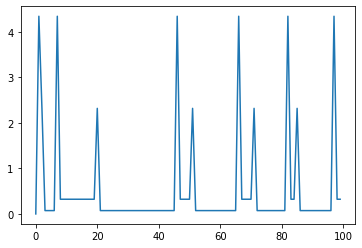

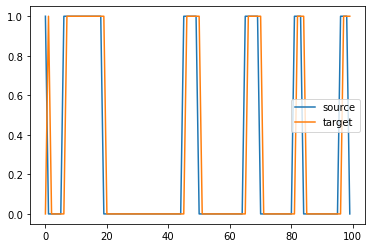

In [9]:
locals_df[0:100].plot()
data[0:100][:].plot()

## 9 Examine the results

Where did the source add the most information in the context of the target past? Why?  

Where did the source add the least information in the context of the target past? Why?

We don't see any negative values of local TE here - can you explain why?

## 10 Optional challenge task

Optional (and difficult!) Challenge task:   
Calculate analytically the local transfer entropy for each configuration, as well as the average transfer entropy,   
that we expect to get here as a function of the transition probabilities λ0 and λ1 .  
You can start with the transition probabilities p(xn+1∣xn,yn) and p(xn+1∣xn) - and you will also need to work out the probabilities  
of each value xn=0,1 of the target (the derivation for these is shown in the comments of generateHeartbeatMessages.m if you get stuck),   
then plug everything through the TE equation.   
A full solution is available  Download available.

## 11 optional challenge task

Challenge task: Compute the local lagged mutual information (across one time step from the source to the target) by adding to and adapting the above code.   
Compare the results, and discuss why they are different.   
(Note that the local MI values generated by JIDT here will need a 0 padded to the front in order to align them with the local TE values.)

In [10]:

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").MutualInformationCalculatorDiscrete
calc = calcClass(2, 2, 1)
# 2. No other properties to set for discrete calculators.
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.addObservations(source, target)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

locals_MI = calc.computeLocalFromPreviousObservations(source, target)

print("MI_Discrete(col_0 -> col_1) = %.4f bits" %
    (result))

MI_Discrete(col_0 -> col_1) = 0.7166 bits


In [11]:
locals_MI_df=pd.Series(locals_MI)

<AxesSubplot:>

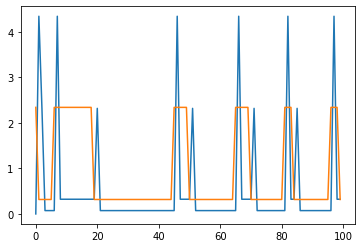

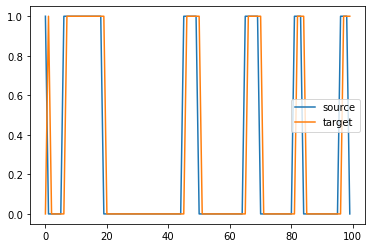

In [12]:
locals_df[0:100].plot(label='TE')
locals_MI_df[0:100].plot()
data[0:100][:].plot()

<AxesSubplot:>

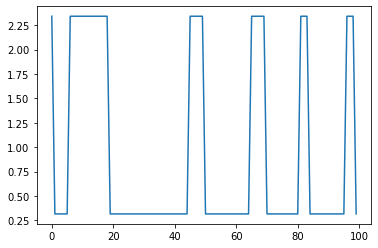

In [13]:
locals_MI_df[0:100].plot()

In [14]:
calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
calc = calcClass(2, 1)
# 2. No other properties to set for discrete calculators.
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.addObservations(target)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

locals_targetAIS = calc.computeLocalFromPreviousObservations(target)

print("AIS_Discrete(col_0) = %.4f bits" %
    (result))


AIS_Discrete(col_0) = 0.3467 bits


In [15]:
locals_targetAIS_df=pd.Series(locals_targetAIS)

<AxesSubplot:>

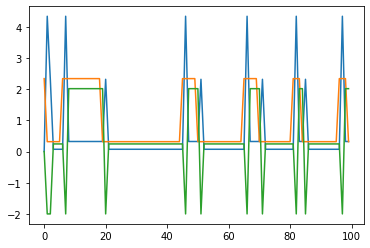

In [16]:
locals_df[0:100].plot()
locals_MI_df[0:100].plot()
locals_targetAIS_df[0:100].plot()

<AxesSubplot:>

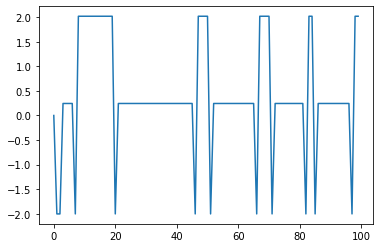

In [17]:
locals_targetAIS_df[0:100].plot()

# activity 5 - Module 11

In [18]:

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").TransferEntropyCalculatorDiscrete
# base
# k_history (target)
# k_tau (target)
# i_history (source)
# i_tau (source)
# delay
calc = calcClass(2, 1, 1, 1, 1, 1)
# 2. No other properties to set for discrete calculators.
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.addObservations(source, target)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

locals = calc.computeLocalFromPreviousObservations(source, target)

print("TE_Discrete(col_0 -> col_1) = %.4f bits" %
    (result))

TE_Discrete(col_0 -> col_1) = 0.3699 bits
